# ENSF 444 Project 

### Name: Manbir Briar and Victor Gouttin

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset: Breast Cancer Wisconsin (Diagnostic) from UC Irvine

In [375]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()

# Convert to pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add target column
df['target'] = data.target

# Display first few rows
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## Data Processing:

In [376]:
# Seperate data into X and y
X = df.drop('target', axis=1)
y = df['target']

# Check shape of X and y mathc
print(f"Shape of X: {X.shape}, Type of X: {type(X)}")
print(f"Shape of y: {y.shape}, Type of y: {type(y)}")

# Check for missing values
print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum().sum()}")

# Check datatypes of all features
print(df.dtypes)

Shape of X: (569, 30), Type of X: <class 'pandas.core.frame.DataFrame'>
Shape of y: (569,), Type of y: <class 'pandas.core.series.Series'>
Missing values in X: 0
Missing values in y: 0
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area

### Visualization:

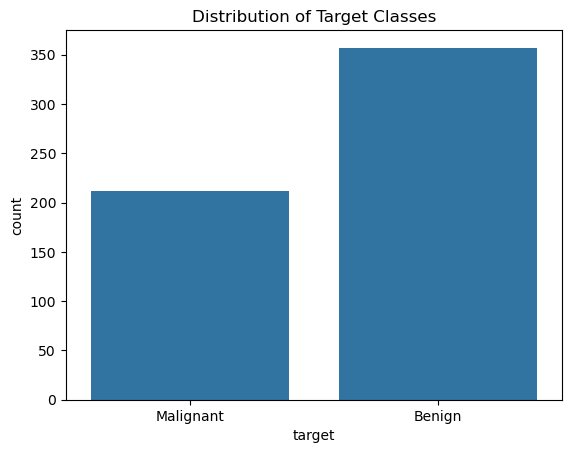

In [377]:
# Show number of instances for targets
sns.countplot(x=y)
plt.title('Distribution of Target Classes')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.show()

Here, we use the top 3 features most correlated with the target to demonstrate that the data is separable based on individual features.

Top correlated features: ['worst concave points', 'worst perimeter', 'mean concave points']


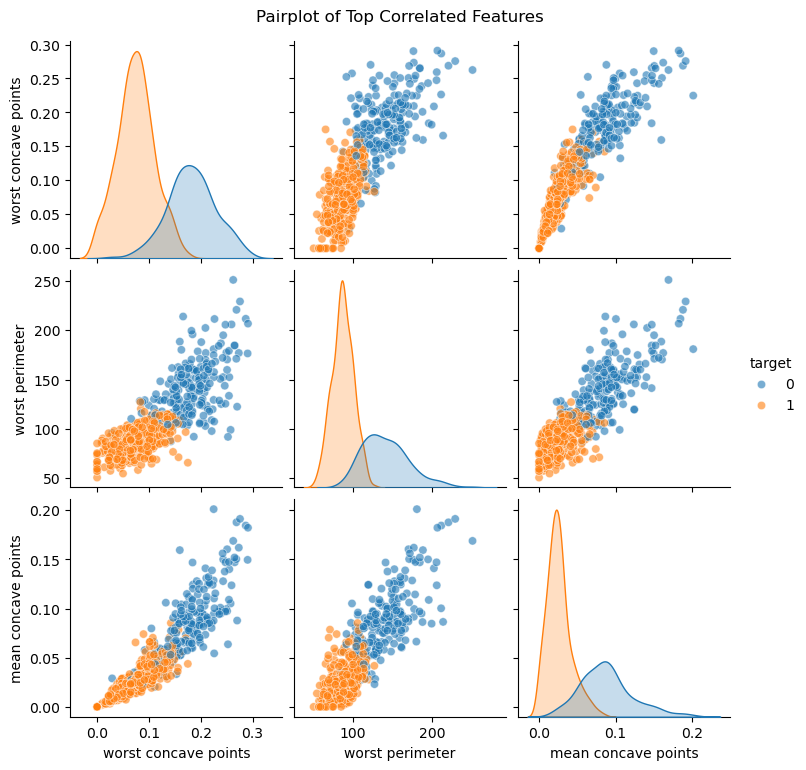

In [378]:
# Top 3 features most correlated with target
top_features = df.corr(numeric_only=True)['target'].abs().sort_values(ascending=False)[1:4].index.tolist()
print("Top correlated features:", top_features)
sns.pairplot(df[top_features + ['target']], hue='target', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Top Correlated Features', y=1.02)
plt.show()



Here, we reduce the data to 2 dimensions using PCA to visualize how well the classes are separated, to show we can develop a high accuracy model to classify our 2 targets.

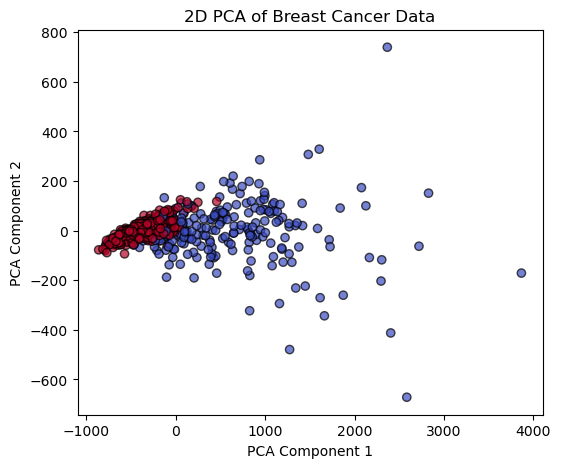

In [379]:
from sklearn.decomposition import PCA

# 2 dimensions 
pca = PCA(n_components=2)

# Reduce data to 2 dimensions
X_pca = pca.fit_transform(X)

# Plot components visualization 
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Breast Cancer Data')
plt.show()


In [380]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model #1 (Linear): Logistic Regression

### Without Scaling:


Classification Report:
               precision    recall  f1-score   support

           0     0.9200    0.9787    0.9485        47
           1     0.9844    0.9403    0.9618        67

    accuracy                         0.9561       114
   macro avg     0.9522    0.9595    0.9551       114
weighted avg     0.9578    0.9561    0.9563       114



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


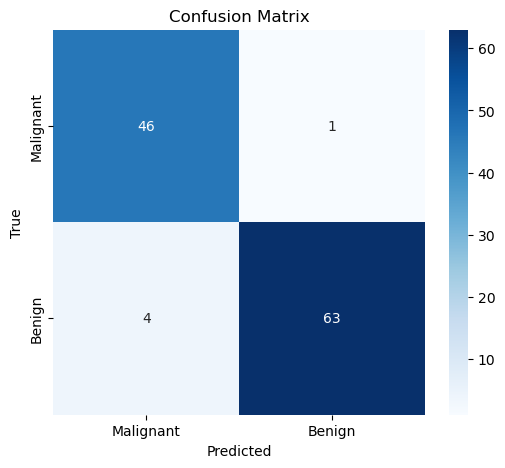

In [381]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Instantiate model
model_lr = LogisticRegression(max_iter=1000)

# Fit training data to model
model_lr.fit(X_train, y_train)

# Predict unseen data from test set using model after training
y_pred_lr = model_lr.predict(X_test)

# Performance metrics for validation
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, digits=4))

cm = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix for visualization 
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


### With Scaling:

As shown below, scaling improves the performance of logistic regression by ensuring all features contribute equally, rather than some dominating the model.

Training Accuracy: 0.9890
Mean cross-validation score: 0.9802197802197803

Classification Report:
               precision    recall  f1-score   support

           0     0.9574    0.9574    0.9574        47
           1     0.9701    0.9701    0.9701        67

    accuracy                         0.9649       114
   macro avg     0.9638    0.9638    0.9638       114
weighted avg     0.9649    0.9649    0.9649       114



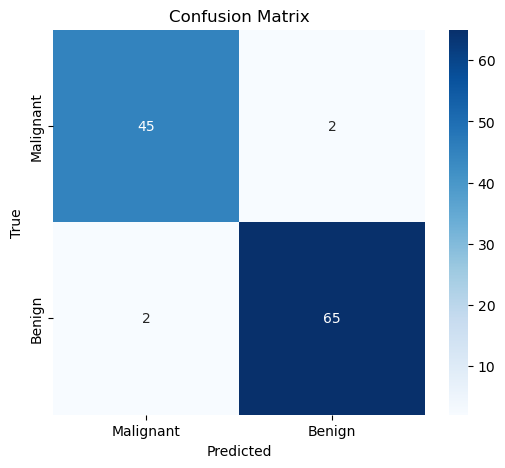

In [382]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Scale data to using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit training data to model with scaled data now
model_lr.fit(X_train_scaled, y_train)

# Predict unseen data from test set using model after training
y_pred_lrs = model_lr.predict(X_test_scaled)

train_score = model_lr.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_score:.4f}")

# Cross-validation on the training data
cv_scores = cross_val_score(model_lr, X_train_scaled, y_train, cv=5)
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Performance metrics for validation
print("\nClassification Report:\n", classification_report(y_test, y_pred_lrs, digits=4))

# Plot confusion matrix for visualization 
cm = confusion_matrix(y_test, y_pred_lrs)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

We can adjust the probability threshold to increase the likelihood of a positive classification. In this case, we lower the threshold to increase the chance of classifying a sample as malignant (cancerous). This is useful in situations where it's preferable to err on the side of caution by classifying something as cancerous, allowing for further testing, rather than risk a false negative, where a cancerous case is incorrectly predicted as benign. 

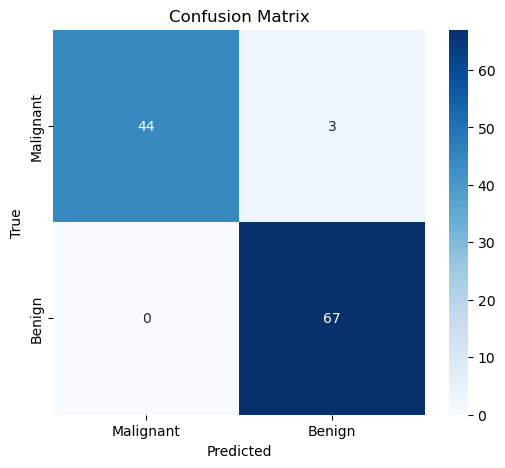

In [383]:
# Make predictions using an adjusted probability threshold, classify as positive if probability ≥ 0.3
y_val_adjusted = (model_lr.predict_proba(X_test_scaled)[:, 1] >= 0.3).astype(bool)

# Create confusion matrix
cm = confusion_matrix(y_test, y_val_adjusted)

# Plot confusion matrix for visualization 
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Model #2 (Non-Linear): Random Forest Classifier 

Best Hyperparameters: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__n_estimators': 100}
Best cross-validation accuracy: 0.9560

Classification Report:
               precision    recall  f1-score   support

           0     0.9388    0.9787    0.9583        47
           1     0.9846    0.9552    0.9697        67

    accuracy                         0.9649       114
   macro avg     0.9617    0.9670    0.9640       114
weighted avg     0.9657    0.9649    0.9650       114



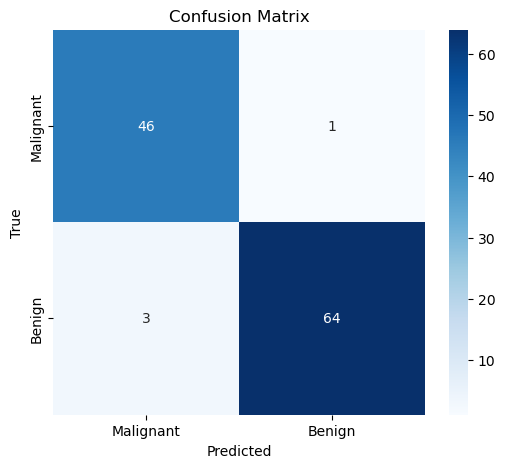

In [384]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Define the pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling step
    ('rf', RandomForestClassifier(random_state=0))  # Random Forest classifier
])

# Define hyperparameters to tune for SVC
param_grid = {
    'rf__n_estimators': [50, 100, 200, 500],  # Number of trees
    'rf__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees (none goes to pure leaf)
    'rf__max_features': ['sqrt', 'log2', None],  # Valid options for max_features
}

# Create GridSearchCV
grid_search_rf = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    n_jobs=-1, 
    verbose=0, 
    scoring='accuracy'
)

# Fit the grid search model on the training data
grid_search_rf.fit(X_train, y_train)

# Best model based on best cross validation score
best_rf = grid_search_rf.best_estimator_

# Predict unseen data from test set using model after training
y_pred_rf = best_rf.predict(X_test)

# Best hyperparameters
print(f"Best Hyperparameters: {grid_search_rf.best_params_}")

# Best cross-validation accuracy
print(f"Best cross-validation accuracy: {grid_search_rf.best_score_:.4f}")

# Performance metrics for validation
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))


# Create confusion matrix
cm  = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for visualization 
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Model #3 (Non-Linear): Support Vector Classifier

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best cross-validation accuracy: 0.9780

Classification Report:
               precision    recall  f1-score   support

           0     0.9783    0.9574    0.9677        47
           1     0.9706    0.9851    0.9778        67

    accuracy                         0.9737       114
   macro avg     0.9744    0.9713    0.9728       114
weighted avg     0.9738    0.9737    0.9736       114



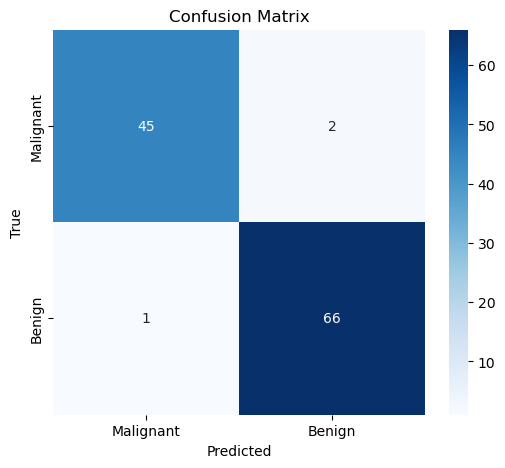

In [385]:
from sklearn.svm import SVC

# Define the pipeline with StandardScaler and SVC
pipeline_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define hyperparameters to tune for SVC
param_grid_svc = {
    'svc__C': [0.1, 1, 10],  # Regularization parameter: lower values = more regularization (simpler model), higher values = less regularization
    'svc__kernel': ['linear', 'rbf'],  # Kernel type: 'linear' is for linear separation, 'rbf' is for non-linear decision boundaries
    'svc__gamma': ['scale', 'auto']  # Gamma defines how far the influence of a single training example reaches (for rbf kernel)
}


# Create GridSearchCV
grid_search_svc = GridSearchCV(
    pipeline_svc,
    param_grid_svc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search_svc.fit(X_train, y_train)

# Best model based on best cross validation score
best_svc = grid_search_svc.best_estimator_

# Predict unseen data from test set using model after training
y_pred_svc = best_svc.predict(X_test)

# Best Hyperparameters
print("Best Hyperparameters:", grid_search_svc.best_params_)

# Best cross-validation accuracy (our training score here)
print(f"Best cross-validation accuracy: {grid_search_svc.best_score_:.4f}")

# Performance metrics for validation
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc, digits=4))


# Create confusion matrix
cm  = confusion_matrix(y_test, y_pred_svc)

# Plot confusion matrix for visualization 
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Comparison and Conclusion

In [386]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lrs))
print("Precision:", precision_score(y_test, y_pred_lrs))
print("Recall:", recall_score(y_test, y_pred_lrs))
print("F1 Score:", f1_score(y_test, y_pred_lrs))
print("-" * 50)

# Random Forest Classifier
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("-" * 50)

# Support Vector Classifier
print("Support Vector Classifier Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Precision:", precision_score(y_test, y_pred_svc))
print("Recall:", recall_score(y_test, y_pred_svc))
print("F1 Score:", f1_score(y_test, y_pred_svc))


Logistic Regression Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433
F1 Score: 0.9701492537313433
--------------------------------------------------
Random Forest Classifier Accuracy: 0.9649122807017544
Precision: 0.9846153846153847
Recall: 0.9552238805970149
F1 Score: 0.9696969696969697
--------------------------------------------------
Support Vector Classifier Accuracy: 0.9736842105263158
Precision: 0.9705882352941176
Recall: 0.9850746268656716
F1 Score: 0.9777777777777777


In the end, we found that the Support Vector Classifier was the best model, achieving the highest accuracy along with the best recall score. Recall is particularly important in this context, as we want to identify as many breast cancer cases as possiblem, allowing for further testing in cases where predictions may be incorrect. Logistic Regression and Random Forest Classifier were not far off though with both achieving 96% accuracy which is still very high.


The 444 project concludes that the Support Vector Classifier is the most effective model for classifying breast tumors as malignant using the 30 available features. We also recommend using threshold control when the goal is to avoid false negatives.